In [ ]:
# import the libraries
#!pip install pandas_datareader pandas --upgrade
import yfinance as yf
import time
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [ ]:
#Get the stock code
# Specify the stock symbol
stock_symbol = 'ADANIPORTS.NS' #CHANGE THE STOCK SYMBOL TO THE REQUIRED COMPANY'S SYMBOL (CHECK ONLINE)

# Define the date range
start_date = '2015-01-01'
end_date = '2025-01-27' #CHANGE THE END DATE TO TODAY'S DATE BEFORE EXECUTING

# Fetch the stock data
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the data
df.head(1)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ADANIPORTS.NS,ADANIPORTS.NS,ADANIPORTS.NS,ADANIPORTS.NS,ADANIPORTS.NS
Date,,,,,
2015-01-01,303.241028,306.040479,300.109462,302.71911,1456204


In [ ]:
df.tail(1)

Price,Close,High,Low,Open,Volume
Ticker,ADANIPORTS.NS,ADANIPORTS.NS,ADANIPORTS.NS,ADANIPORTS.NS,ADANIPORTS.NS
Date,,,,,
2025-01-24,1094.150024,1115.0,1088.25,1104.150024,2400140


In [ ]:
# Get the number of rows and columns in the data set
df.shape    # (no.of rows, no.of columns)

(2485, 5)

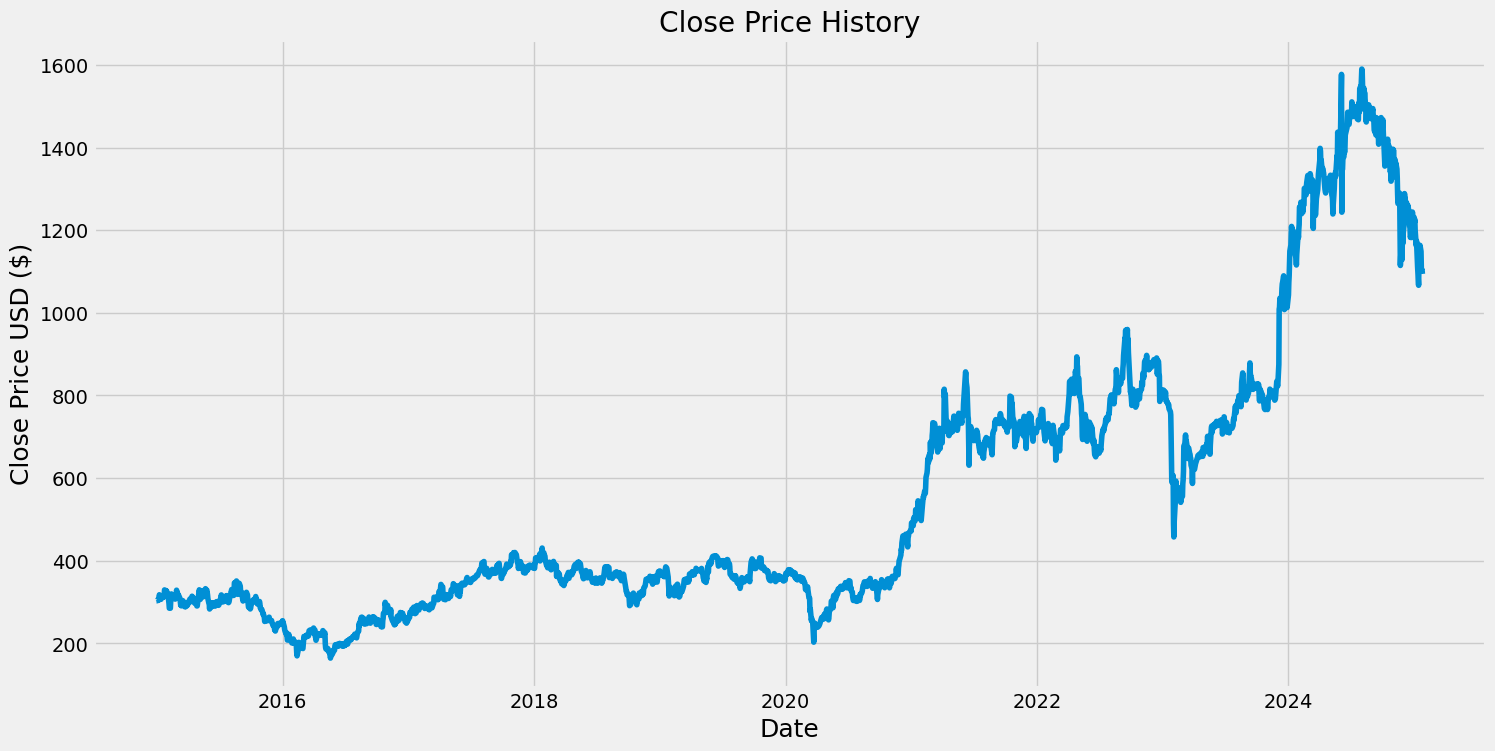

In [ ]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title ('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# create a new data frame with only the close column
data = df['Close']
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .798888)
training_data_len

1986

In [ ]:
data

Ticker,ADANIPORTS.NS
Date,
2015-01-01,303.241028
2015-01-02,303.051239
2015-01-05,307.274200
2015-01-06,305.423706
2015-01-07,304.711975
...,...
2025-01-20,1148.699951
2025-01-21,1106.199951
2025-01-22,1102.250000


In [ ]:
last_row_index = len(dataset) - 1
test_start_index = 2117
test_data = dataset[test_start_index:last_row_index + 1]
test_data_df = pd.DataFrame(test_data)
test_data_df.reset_index(drop=True, inplace=True)


In [ ]:
test_data

array([[ 752.47155762],
       [ 774.52685547],
       [ 762.08026123],
       [ 758.19696045],
       [ 770.04608154],
       [ 771.93798828],
       [ 788.01904297],
       [ 780.84979248],
       [ 787.72027588],
       [ 799.37030029],
       [ 797.62774658],
       [ 783.78717041],
       [ 772.78436279],
       [ 806.19104004],
       [ 832.32891846],
       [ 854.48388672],
       [ 850.84942627],
       [ 822.17248535],
       [ 818.83679199],
       [ 803.15405273],
       [ 804.00042725],
       [ 820.03167725],
       [ 815.20239258],
       [ 788.81561279],
       [ 796.08441162],
       [ 797.62774658],
       [ 801.5111084 ],
       [ 803.60211182],
       [ 806.44000244],
       [ 821.47546387],
       [ 878.68005371],
       [ 855.08129883],
       [ 846.06994629],
       [ 846.16949463],
       [ 842.03729248],
       [ 827.6987915 ],
       [ 814.55511475],
       [ 827.54937744],
       [ 823.51672363],
       [ 822.1227417 ],
       [ 817.84106445],
       [ 827.151

In [ ]:
print(len(dataset[test_start_index:last_row_index] + 1))

367


In [ ]:
dataset

In [ ]:
# Scale the data (preprocessing, normalizing/scaling the data)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.09760242],
       [0.09746934],
       [0.10043054],
       ...,
       [0.65787806],
       [0.65910519],
       [0.65219825]])

In [ ]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
test_data = scaled_data[test_start_index:last_row_index + 1]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.09760242, 0.09746934, 0.10043054, 0.09913295, 0.09863387,
       0.10758384, 0.10532138, 0.10352475, 0.09989816, 0.10538791,
       0.10495538, 0.10512176, 0.10345822, 0.10488885, 0.10412365,
       0.10415687, 0.11580182, 0.11463738, 0.11071133, 0.1139719 ,
       0.11190914, 0.10848214, 0.10309221, 0.0987337 , 0.09271159,
       0.08472647, 0.08469321, 0.09647125, 0.101961  , 0.10894794,
       0.10811617, 0.10538791, 0.10708477, 0.10711804, 0.10389072,
       0.10016435, 0.1072511 , 0.10335841, 0.10275947, 0.11536928,
       0.10478905, 0.10891466, 0.10588698, 0.10658569, 0.10122903,
       0.09627158, 0.08978371, 0.09141399, 0.0887523 , 0.09344355,
       0.09760242, 0.0956727 , 0.09317736, 0.0900166 , 0.08715529,
       0.08931791, 0.0944084 , 0.08738816, 0.08792055, 0.09028283])]
[0.09004989424665781]



In [ ]:
print(len(x_train))
print(len(y_train))

1926
1926


In [ ]:
#convert the x_train and y_train to numpy array, so that we can now use them to train the model
x_train, y_train =np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data,because LSTM requires inputs to be in 3-dim(no.of samples,no.of time stamps, no.of features) and right now our data is in 2-dim
 #x_train.shape # we will only get 2-dim (rows,columns)
# now convert the array to 3-dim
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1)) #no. of rows, no.columns, closing price
x_train.shape

(1926, 60, 1)

In [ ]:
#Built the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(128, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train,y_train,batch_size=16,epochs=10)

Epoch 1/5
1926/1926 ━━━━━━━━━━━━━━━━━━━━ 148s 75ms/step - loss: 8.4502e-04
Epoch 2/5
1926/1926 ━━━━━━━━━━━━━━━━━━━━ 202s 75ms/step - loss: 3.5638e-04
Epoch 3/5
1926/1926 ━━━━━━━━━━━━━━━━━━━━ 144s 75ms/step - loss: 2.1249e-04
Epoch 4/5
1926/1926 ━━━━━━━━━━━━━━━━━━━━ 202s 75ms/step - loss: 1.7285e-04
Epoch 5/5
1926/1926 ━━━━━━━━━━━━━━━━━━━━ 203s 75ms/step - loss: 2.1294e-04


In [ ]:
#create the testing data set
#create a new array containing scaled values from index 2047 to 2507
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # all the values that we want our model to predict, actual test values
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  # these values are not scaled, they are the original data

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data (from 2-dim to 3-dim)
x_test =np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1)) #No.of rows,no.of columns,no.of features

In [ ]:
# get the model's predicted price values (we want predicitions based on the x_test dataset)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # we want predictions to contain the same values as our y_test data set contains
# we are unscaling the values

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


In [ ]:
# get the root mean squared error (RMSE) lower value indicates a better fit
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

59.72576550370825

In [66]:
# Creating the dataframes for plotting
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
train.columns = ['Close']
valid.columns = ['Close','Predictions']

<ipython-input-66-7a36a0ad90a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


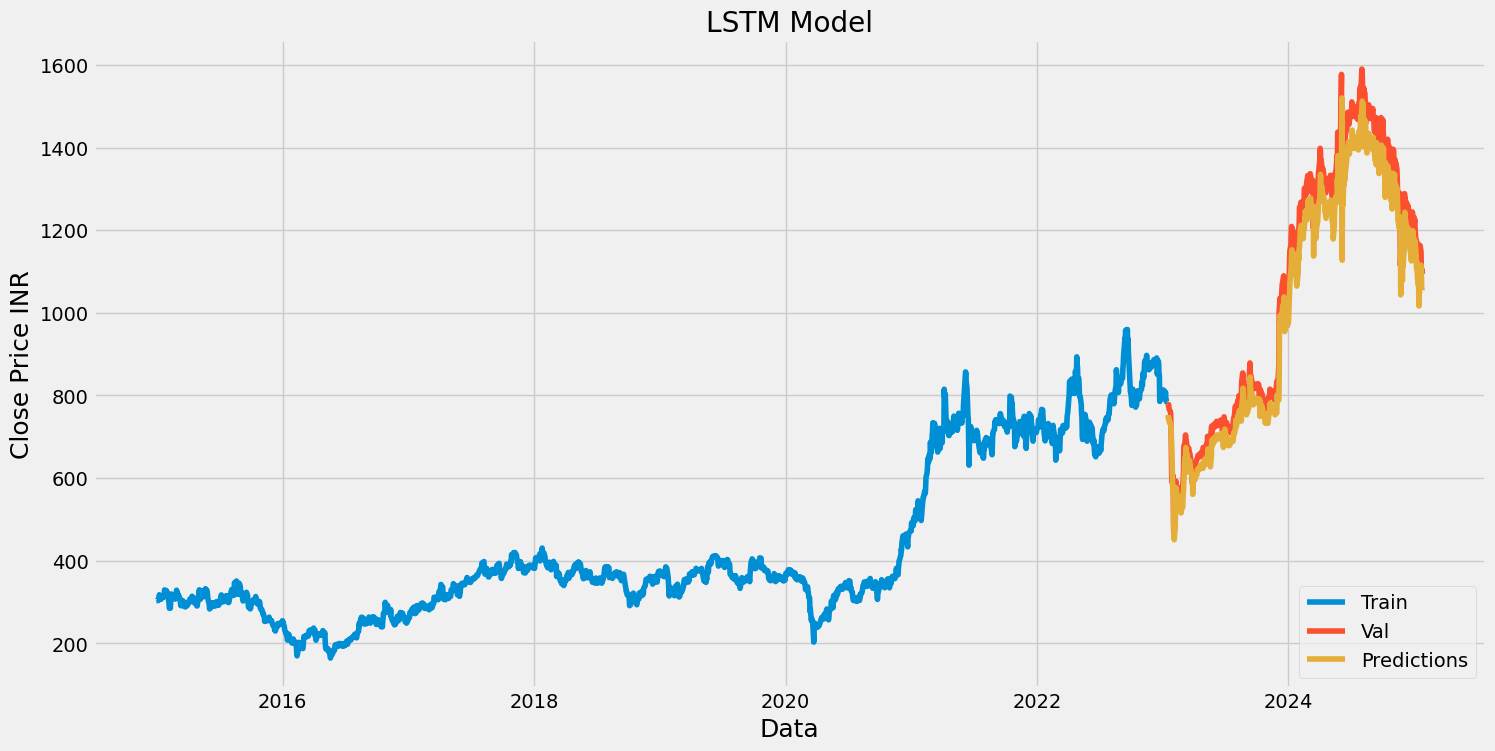

In [69]:
# visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [70]:
# show the valid and predicted prices
# ? need to add this column in the table, predicted values and the training data set
valid.reset_index(inplace=True)
valid

,Date,Close,Predictions
0,2023-01-16,778.454224,752.626465
1,2023-01-17,776.179382,744.268738
2,2023-01-18,777.910278,743.480774
3,2023-01-19,767.574402,744.771423
4,2023-01-20,765.991882,734.034363
...,...,...,...
494,2025-01-20,1148.699951,1115.392334
495,2025-01-21,1106.199951,1098.586670
496,2025-01-22,1102.250000,1054.312134
497,2025-01-23,1104.000000,1054.748291


In [71]:
valid

,Date,Close,Predictions
0,2023-01-16,778.454224,752.626465
1,2023-01-17,776.179382,744.268738
2,2023-01-18,777.910278,743.480774
3,2023-01-19,767.574402,744.771423
4,2023-01-20,765.991882,734.034363
...,...,...,...
494,2025-01-20,1148.699951,1115.392334
495,2025-01-21,1106.199951,1098.586670
496,2025-01-22,1102.250000,1054.312134
497,2025-01-23,1104.000000,1054.748291


In [72]:
data.reset_index(inplace=True)

In [73]:
first_date = str(valid.loc[0, 'Date'])[:10]
print(first_date)
mask = data['Date'] < str(first_date)

# Use the mask to create a new DataFrame with filtered data
filtered_data = data[mask]

2023-01-16


In [77]:
filtered_data
filtered_data.columns = ['Date','Close']

In [78]:
filtered_data['Predictions'] = filtered_data['Close']

<ipython-input-78-5c3026d13570>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Predictions'] = filtered_data['Close']


In [79]:
filtered_data

,Date,Close,Predictions
0,2015-01-01,303.241028,303.241028
1,2015-01-02,303.051239,303.051239
2,2015-01-05,307.274200,307.274200
3,2015-01-06,305.423706,305.423706
4,2015-01-07,304.711975,304.711975
...,...,...,...
1981,2023-01-09,807.731018,807.731018
1982,2023-01-10,787.702209,787.702209
1983,2023-01-11,787.751587,787.751587
1984,2023-01-12,784.289856,784.289856


In [83]:
final_dataset = pd.merge(filtered_data, valid, on=['Date', 'Close','Predictions'], how='outer')

In [84]:
# final_dataset.rename(columns={'Predictions': 'PredictionsLast20%'}, inplace=True)
final_dataset

,Date,Close,Predictions
0,2015-01-01,303.241028,303.241028
1,2015-01-02,303.051239,303.051239
2,2015-01-05,307.274200,307.274200
3,2015-01-06,305.423706,305.423706
4,2015-01-07,304.711975,304.711975
...,...,...,...
2480,2025-01-20,1148.699951,1115.392334
2481,2025-01-21,1106.199951,1098.586670
2482,2025-01-22,1102.250000,1054.312134
2483,2025-01-23,1104.000000,1054.748291


In [85]:
#PREDICTION ACCURACY FOR THE LAST DAY
last_row = final_dataset.iloc[-1]
percent_error = abs(last_row["Close"] - last_row["Predictions"]) / last_row["Close"] * 100
print(percent_error)

3.7374054154524066


In [82]:
final_dataset.to_csv('ADANI.csv', index=False, header=False) #CHANGE THE NAME OF THE CSV FILE HERE